In [1]:
class chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    
    def __init__(self, x0, r):
        self.x, self.r = x0, r
       
    
    def update(self):
        self.x = self.r * self.x * (1 - self.x) 
        
        return(self.x)
    
    
    def generate_sequence(self,t):
        path = []
        
        for i in range(t):
            path.append(self.x)
            self.update()
        
        return(path)       

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

T = 1000
ch_paths = np.empty([T,T])

for i in range(T):
        ch = chaos(i/T, 4)
        ch_= ch.generate_sequence(T)
        
        for j in range(T):
            ch_paths[i][j] = ch_[j]

fig = plt.figure(figsize=(42,36))
ax = plt.axes(projection='3d')
ax.invert_yaxis()
ax.view_init(90, 0)

ax.contour3D(range(T), range(T), ch_paths, 50, cmap='binary')

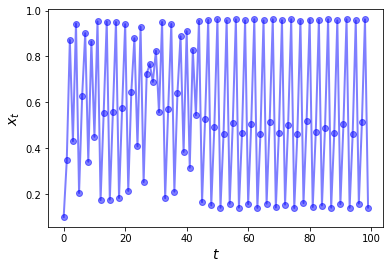

In [23]:
ch2 = chaos(0.1, 3.85)
ts_length = 100

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)

x = ch2.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='x_t')

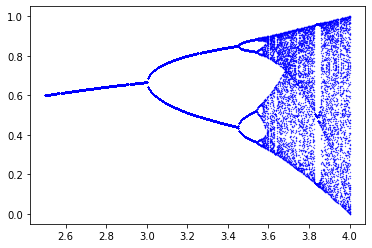

In [32]:
ch4 = chaos(0.1, 4)
r = 2.5

fig, ax = plt.subplots()

while r<4:
    ch4.r = r
    t = ch4.generate_sequence(1000)[900:]
    ax.plot([r]*len(t), t, 'b.', ms=0.6)
    r = r + 0.005